In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, BatchNormalization
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
lag = 10

In [3]:
def Sigmoid(x):
    return (1.0 / (1.0 + np.exp(-x)))

In [74]:
data = pd.read_csv('traffic speed.csv')
print(data.shape)
data.head(10)

(722789, 9)


,time,M,D,H,min,sec,sec2,speed,Headway
0,2.019010e+16,1,1,0,0,20,0.8,101.74,30.0
1,2.019010e+16,1,1,0,0,25,0.7,106.23,4.9
2,2.019010e+16,1,1,0,1,0,0.1,89.17,34.4
3,2.019010e+16,1,1,0,2,18,0.5,111.07,78.4
4,2.019010e+16,1,1,0,2,36,0.9,102.55,18.4
5,2.019010e+16,1,1,0,3,6,0.9,82.00,30.0
6,2.019010e+16,1,1,0,3,26,0.9,102.89,20.0
7,2.019010e+16,1,1,0,5,3,0.2,104.68,96.3
8,2.019010e+16,1,1,0,5,19,0.7,82.70,16.5
9,2.019010e+16,1,1,0,5,54,0.8,101.96,35.1


In [75]:
Month = data['M'].values.reshape(-1, 1)
Day = data['D'].values.reshape(-1, 1)
Hour = data['H'].values.reshape(-1, 1)
Speed = data['speed'].values.reshape(-1, 1)
Headway = data['Headway'].values.reshape(-1, 1)

In [76]:
arr = np.concatenate((Month, Day, Hour, Headway, Speed), axis=1)
print(arr.shape)
arr

(722789, 5)


array([[  1.  ,   1.  ,   0.  ,  30.  , 101.74],
       [  1.  ,   1.  ,   0.  ,   4.9 , 106.23],
       [  1.  ,   1.  ,   0.  ,  34.4 ,  89.17],
       ...,
       [  2.  ,  28.  ,  23.  ,  38.9 ,  89.87],
       [  2.  ,  28.  ,  23.  ,  24.9 , 114.23],
       [  2.  ,  28.  ,  23.  ,   8.4 , 114.66]])

In [77]:
#arr = np.array(data)
#print(arr.shape)

In [78]:
train = arr[:700000,:]
test = arr[700001:,:]
print(train.shape)
print(test.shape)

(700000, 5)
(22788, 5)


In [79]:
#train 데이터를 3D(9겹) array로 만들기
train_arr = []
for i in range(9):
    train_arr.append(train[i:i-lag,:])

train_arr = np.array(train_arr, dtype=np.single)
print(train_arr.shape)

(9, 699990, 5)


In [80]:
x_train_val = np.concatenate((train_arr[0], train_arr[1], train_arr[2], train_arr[3], train_arr[4], train_arr[5], train_arr[6], train_arr[7], train_arr[8]), axis=1).reshape(-1, 9, 5)
#train_mean, train_std = np.mean(x_train_val, axis=0), np.std(x_train_val, axis=0)
#train_mean, train_std = np.mean(train_mean, axis=0), np.mean(train_std, axis=0)

In [81]:
#x_train_val = (x_train_val - train_mean) / (2 * train_std)
#x_train_val = Sigmoid(x_train_val)

In [82]:
x_train_val

array([[[  1.  ,   1.  ,   0.  ,  30.  , 101.74],
        [  1.  ,   1.  ,   0.  ,   4.9 , 106.23],
        [  1.  ,   1.  ,   0.  ,  34.4 ,  89.17],
        ...,
        [  1.  ,   1.  ,   0.  ,  20.  , 102.89],
        [  1.  ,   1.  ,   0.  ,  96.3 , 104.68],
        [  1.  ,   1.  ,   0.  ,  16.5 ,  82.7 ]],

       [[  1.  ,   1.  ,   0.  ,   4.9 , 106.23],
        [  1.  ,   1.  ,   0.  ,  34.4 ,  89.17],
        [  1.  ,   1.  ,   0.  ,  78.4 , 111.07],
        ...,
        [  1.  ,   1.  ,   0.  ,  96.3 , 104.68],
        [  1.  ,   1.  ,   0.  ,  16.5 ,  82.7 ],
        [  1.  ,   1.  ,   0.  ,  35.1 , 101.96]],

       [[  1.  ,   1.  ,   0.  ,  34.4 ,  89.17],
        [  1.  ,   1.  ,   0.  ,  78.4 , 111.07],
        [  1.  ,   1.  ,   0.  ,  18.4 , 102.55],
        ...,
        [  1.  ,   1.  ,   0.  ,  16.5 ,  82.7 ],
        [  1.  ,   1.  ,   0.  ,  35.1 , 101.96],
        [  1.  ,   1.  ,   0.  ,  27.6 , 121.73]],

       ...,

       [[  2.  ,  27.  ,   9.  ,   1.4 ,  

In [83]:
y_train_val = train[lag:, 4:5]
#y_train_val = (y_train_val - train_mean) / (2 * train_std)
#y_train_val = Sigmoid(y_train_val)

print(x_train_val.shape, y_train_val.shape)
y_train_val

(699990, 9, 5) (699990, 1)


array([[121.73],
       [ 97.57],
       [ 99.21],
       ...,
       [ 75.49],
       [ 71.66],
       [ 71.39]])

In [84]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2)
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(559992, 9, 5) (559992, 1) (139998, 9, 5) (139998, 1)


In [85]:
test_arr = []
for i in range(9):
    test_arr.append(test[i:i-lag,:])

test_arr = np.array(test_arr, dtype=np.float32)
print(test_arr.shape)

(9, 22778, 5)


In [86]:
x_test = np.concatenate((test_arr[0], test_arr[1], test_arr[2], test_arr[3], test_arr[4], test_arr[5], test_arr[6], test_arr[7], test_arr[8]), axis=1).reshape(-1, 9, 5)
print(x_test.shape)
x_test

(22778, 9, 5)


array([[[  2.  ,  27.  ,   9.  ,   2.8 ,  76.85],
        [  2.  ,  27.  ,   9.  ,   3.  ,  80.36],
        [  2.  ,  27.  ,   9.  ,   0.7 ,  80.38],
        ...,
        [  2.  ,  27.  ,   9.  ,   6.1 , 112.08],
        [  2.  ,  27.  ,   9.  ,  10.8 ,  97.89],
        [  2.  ,  27.  ,   9.  ,   3.7 ,  83.56]],

       [[  2.  ,  27.  ,   9.  ,   3.  ,  80.36],
        [  2.  ,  27.  ,   9.  ,   0.7 ,  80.38],
        [  2.  ,  27.  ,   9.  ,   3.3 ,  83.05],
        ...,
        [  2.  ,  27.  ,   9.  ,  10.8 ,  97.89],
        [  2.  ,  27.  ,   9.  ,   3.7 ,  83.56],
        [  2.  ,  27.  ,   9.  ,   5.1 , 105.34]],

       [[  2.  ,  27.  ,   9.  ,   0.7 ,  80.38],
        [  2.  ,  27.  ,   9.  ,   3.3 ,  83.05],
        [  2.  ,  27.  ,   9.  ,   4.8 ,  90.82],
        ...,
        [  2.  ,  27.  ,   9.  ,   3.7 ,  83.56],
        [  2.  ,  27.  ,   9.  ,   5.1 , 105.34],
        [  2.  ,  27.  ,   9.  ,   1.3 , 104.29]],

       ...,

       [[  2.  ,  28.  ,  23.  ,   6.  ,  

In [87]:
y_test = test[lag:, 4:5]
print(y_test.shape)
y_test

(22778, 1)


array([[104.29],
       [ 92.23],
       [ 85.97],
       ...,
       [ 89.87],
       [114.23],
       [114.66]])

In [130]:
h_units = 64


def rnn_model():
    model = Sequential()
    
    model.add(LSTM(units=h_units, return_sequences=True, activation='relu', input_shape=(9, 5)))   
    model.add(LSTM(units=h_units, return_sequences=True, activation='softmax'))
    model.add(LSTM(units=h_units, return_sequences=False, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    
    return model

In [131]:
# create a model 
model = rnn_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 9, 64)             17920     
_________________________________________________________________
lstm_20 (LSTM)               (None, 9, 64)             33024     
_________________________________________________________________
lstm_21 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 88,193
Trainable params: 88,193
Non-trainable params: 0
_________________________________________________________________


In [132]:
model.compile(loss='MSE', optimizer='adam', metrics=['accuracy'])

In [133]:
# training
tensorBoard = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=False)

#hist = model.fit(x_train, y_train, epochs=100, batch_size=2048, verbose=True, validation_data=(x_val, y_val), shuffle=True, callbacks=[tensorBoard])

hist = model.fit(x_train, y_train,
                 batch_size=1024,
                 epochs=10,
                 verbose=1, 
                 validation_data=(x_val, y_val))
#hist = model.fit(x_train, y_train, epochs=100, batch_size=2048, verbose=True, validation_data=(x_val, y_val), shuffle=True)

Train on 559992 samples, validate on 139998 samples
Epoch 1/10
559992/559992 [==============================] - 34s 60us/step - loss: 805.0033 - acc: 3.7322e-04 - val_loss: 108.2306 - val_acc: 5.4286e-04
Epoch 2/10
559992/559992 [==============================] - 30s 54us/step - loss: 106.0128 - acc: 4.2322e-04 - val_loss: 105.2299 - val_acc: 4.2858e-04
Epoch 3/10
559992/559992 [==============================] - 31s 55us/step - loss: 104.2259 - acc: 4.9286e-04 - val_loss: 102.0097 - val_acc: 5.0001e-04
Epoch 4/10
559992/559992 [==============================] - 30s 54us/step - loss: 104.1379 - acc: 4.5536e-04 - val_loss: 103.7104 - val_acc: 5.5715e-04
Epoch 5/10
559992/559992 [==============================] - 31s 55us/step - loss: 102.9546 - acc: 4.8572e-04 - val_loss: 104.8558 - val_acc: 5.1429e-04
Epoch 6/10
559992/559992 [==============================] - 31s 55us/step - loss: 103.1844 - acc: 4.4643e-04 - val_loss: 101.0219 - val_acc: 4.5715e-04
Epoch 7/10
559992/559992 [==========

In [134]:
y_pred = model.predict(x_test, batch_size=1024, verbose=True) 
print(y_pred.shape)
print(model.evaluate(x_test, y_test,batch_size=1024))

22778/22778 [==============================] - 1s 55us/step
(22778, 1)
22778/22778 [==============================] - 1s 24us/step
[100.26417953487191, 0.0003951180964088155]


In [135]:
y_pred

array([[ 90.78563],
       [ 94.63409],
       [ 95.55217],
       ...,
       [103.37804],
       [102.20891],
       [102.78496]], dtype=float32)

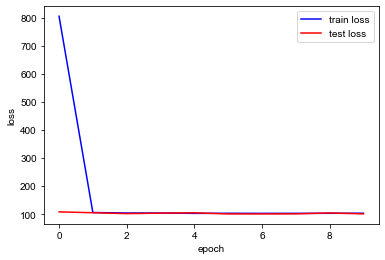

In [136]:
#loss graph 그리기

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(hist.history['loss'], 'b', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper right')

plt.show()

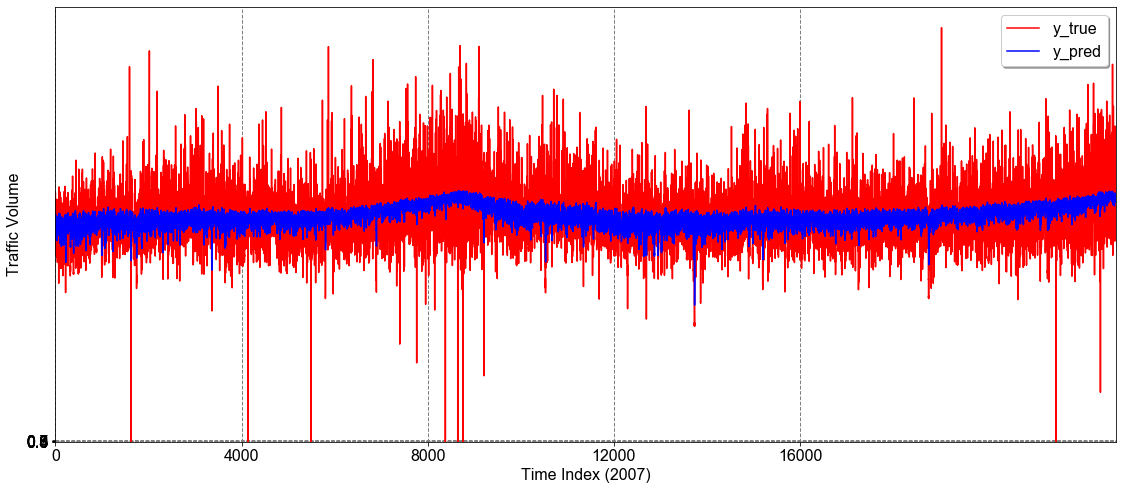

In [137]:
plt.figure(figsize=(19,8))

# set font
font = {'family': 'Arial', 'weight': 'normal', 'size': 16}
plt.rc('font', **font)

# plot data 
plt.plot(y_test[:,], 'r', label='y_true')
plt.plot(y_pred[:,], 'b', label='y_pred')

# set legend position
plt.legend(shadow=True, loc='upper right')

# set x-axis & y-axis titles
#plt.title('prediction result')
plt.xlabel('Time Index (2007)')
plt.ylabel('Traffic Volume')

# set axis-limits
plt.xlim(left = 0, right = len(y_test)) 
plt.ylim(bottom = 0.3) 

# set grid
plt.grid(color='gray', linestyle='--', linewidth=1)

plt.xticks(np.arange(0,20000,4000))
plt.yticks(np.arange(0.3,1.0,0.1))

# save & display figure
plt.show()
